In [ ]:
from google.colab import drive
import tqdm
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install datasets
!pip install deep-translator

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/data/glove.6B.200d.txt'
glove_embeddings={}
with open(path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.array(values[1:], dtype=np.float32)
        glove_embeddings[word] = vector


#data to panda format
def d2p(x,y):
  df = pd.DataFrame({'text':x,'intent':y})
  return df

def plotdata(df):
  plt.figure(figsize=(15,15))
  fig, axs = plt.subplots(1,2)
  plt.subplots_adjust(right = 1.7)
  grouped = df.groupby("intent").count().reset_index()
  axs[0].barh(grouped["intent"], grouped["text"])
  axs[0].set_xlabel("count")
  axs[1].pie(grouped["text"], labels=grouped["intent"], startangle=90, autopct='%1.1f%%')
  axs[1].axis('equal')
  plt.show()

In [ ]:
import os
import pickle
#LOAD ATIS DATA
DATA_DIR = '/content/drive/MyDrive/data'


def load_ds(fname='atis.train.pkl'):
    with open(fname, 'rb') as stream:
        ds, dicts = pickle.load(stream)
    print('Done  loading: ', fname)
    print('      samples: {:4d}'.format(len(ds['query'])))
    print('   vocab_size: {:4d}'.format(len(dicts['token_ids'])))
    print('   slot count: {:4d}'.format(len(dicts['slot_ids'])))
    print(' intent count: {:4d}'.format(len(dicts['intent_ids'])))
    return ds, dicts


def loading_atis():
  train_ds, dicts = load_ds(os.path.join(DATA_DIR, 'atis.train.pkl'))
  test_ds, dicts = load_ds(os.path.join(DATA_DIR, 'atis.test.pkl'))

  t2i, s2i, in2i = map(dicts.get, ['token_ids', 'slot_ids', 'intent_ids'])
  i2t, i2s, i2in = map(lambda d: {d[k]: k for k in d.keys()}, [t2i, s2i, in2i])
  query, slots, intent = map(train_ds.get,
                           ['query', 'slot_labels', 'intent_labels'])

  '''
  for i in range(5):
      print('{:4d}:{:>15}: {}'.format(i, i2in[intent[i][0]],
                                      ' '.join(map(i2t.get, query[i]))))
      for j in range(len(query[i])):
          print('{:>33} {:>40}'.format(i2t[query[i][j]],
                                       i2s[slots[i][j]]))
      print('*' * 74)
  '''

  X=[]
  y_slot=[]
  y_intent=[]

  for i in range(len(query)):
    sent=''
    slot=[]
    for j in range(len(query[i])):
      sent+=i2t[query[i][j]]+' '
      slot.append(i2s[slots[i][j]])
    tmp_tokens=i2in[intent[i][0]].split("+")
    y_intent.append(tmp_tokens[0])
    X.append(sent)
    y_slot.append(slot)
  #y_intent=[element for innerList in y_intent for element in innerList]
  return X, y_slot, y_intent

X1, y_slot, y_intent=loading_atis()

print(y_slot)
print(y_intent)
plotdata(d2p(X1,y_intent))

In [ ]:
df=d2p(X1,y_intent)
intent_cnt = (df.groupby("intent").count().apply(list).to_dict())["text"]
print(intent_cnt)

{'abbreviation': 147, 'aircraft': 82, 'airfare': 424, 'airline': 159, 'airport': 20, 'capacity': 16, 'cheapest': 1, 'city': 19, 'distance': 20, 'flight': 3687, 'flight_no': 12, 'flight_time': 54, 'ground_fare': 18, 'ground_service': 256, 'meal': 6, 'quantity': 51, 'restriction': 6}


In [ ]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
def e2g2e(s):
  return GoogleTranslator(source='auto', target='en').translate(GoogleTranslator(source='auto', target='de').translate(s))
def e2c2e(s):
  return GoogleTranslator(source='auto', target='en').translate(GoogleTranslator(source='auto', target='zh-CN').translate(s))


print('I love NLP and I worked very hard on it.')
print(GoogleTranslator(source='auto', target='de').translate('I love NLP and I worked very hard on it.'))
print(e2g2e('I love NLP and I worked very hard on it.'))

I love NLP and I worked very hard on it.
Ich liebe NLP und habe sehr hart daran gearbeitet.
I love NLP and have worked very hard on it.


100%|██████████| 4978/4978 [1:21:49<00:00,  1.01it/s]


<Figure size 1500x1500 with 0 Axes>

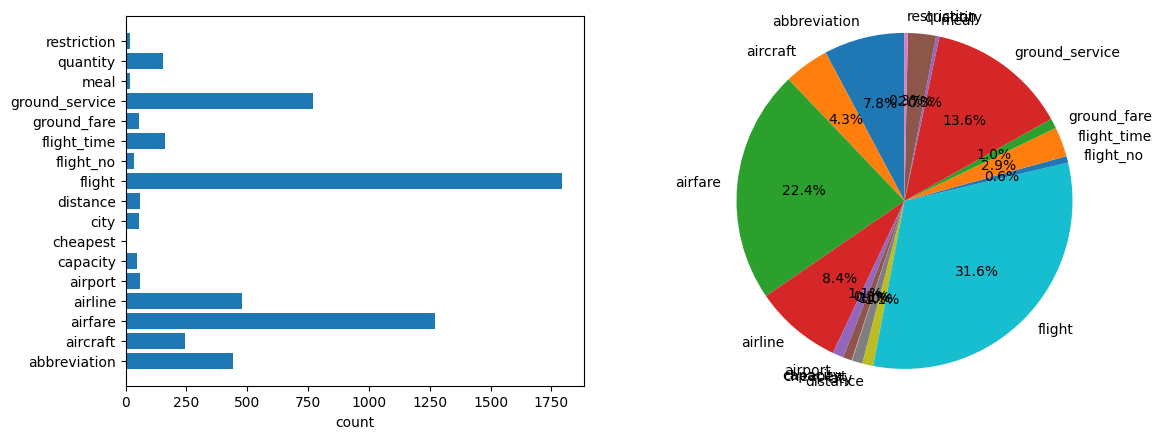

In [ ]:
oldX=X1
oldintent=y_intent
X1=[]
y_intent=[]
for i in tqdm(range(len(oldX))):
  label=oldintent[i]
  text=oldX[i]
  if label!="flight":
    X1.append(text)
    y_intent.append(label)
    X1.append(e2g2e(text))
    y_intent.append(label)
    X1.append(e2c2e(text))
    y_intent.append(label)
  else:
    rand=np.random.randint(0,2)
    if rand==1:
      X1.append(text)
      y_intent.append(label)

plotdata(d2p(X1,y_intent))

In [ ]:
PRINT

In [ ]:
import json
def loading_json():
  X=[]
  y_intent=[]
  chatbot=json.load(open(os.path.join(DATA_DIR,"ChatbotCorpus.json")))
  ubuntu=json.load(open(os.path.join(DATA_DIR,"AskUbuntuCorpus.json")))
  for s in chatbot['sentences']:
    X.append('BOS '+s['text']+' EOS')
    y_intent.append(s['intent'])
  for s in ubuntu['sentences']:
    X.append('BOS '+s['text']+' EOS')
    y_intent.append(s['intent'])

  return X, y_intent

X2,y_intent2=loading_json()

print(y_intent2)
print(X2)
plotdata(d2p(X2,y_intent2))

<Figure size 1500x1500 with 0 Axes>

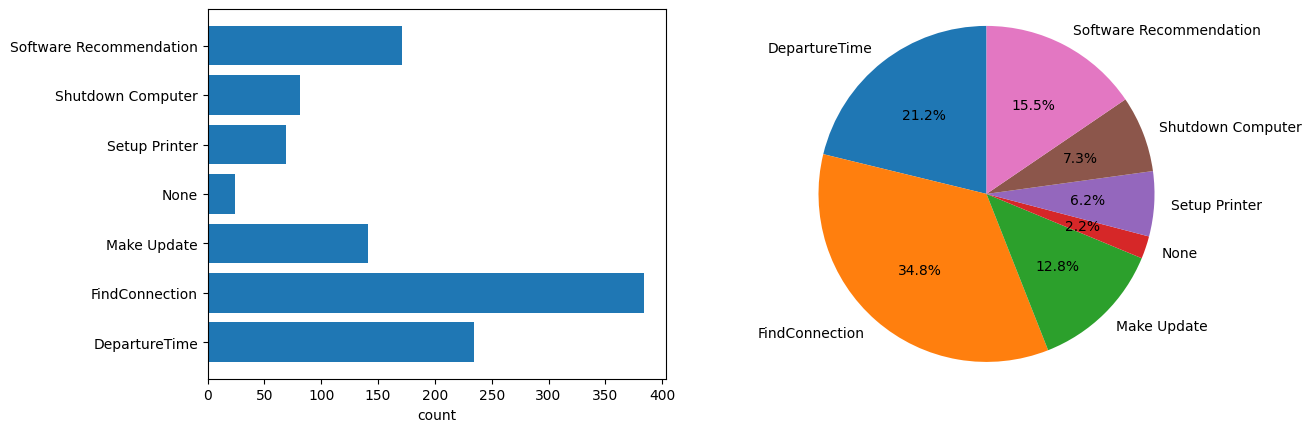

In [ ]:
oldX=X2
oldintent=y_intent2
X2=[]
y_intent2=[]
for i in range(len(oldX)):
  label=oldintent[i]
  text=oldX[i]
  X2.append(text)
  y_intent2.append(label)
  X2.append(e2g2e(text))
  y_intent2.append(label)
  X2.append(e2c2e(text))
  y_intent2.append(label)

plotdata(d2p(X2,y_intent2))

In [ ]:
from datasets import load_dataset
def loading_77():
  dataset = load_dataset("banking77")
  print(dataset)
  train_texts=[]
  train_labels=[]
  test_texts=[]
  test_labels=[]
  labels=[
                        "activate_my_card",
                        "age_limit",
                        "apple_pay_or_google_pay",
                        "atm_support",
                        "automatic_top_up",
                        "balance_not_updated_after_bank_transfer",
                        "balance_not_updated_after_cheque_or_cash_deposit",
                        "beneficiary_not_allowed",
                        "cancel_transfer",
                        "card_about_to_expire",
                        "card_acceptance",
                        "card_arrival",
                        "card_delivery_estimate",
                        "card_linking",
                        "card_not_working",
                        "card_payment_fee_charged",
                        "card_payment_not_recognised",
                        "card_payment_wrong_exchange_rate",
                        "card_swallowed",
                        "cash_withdrawal_charge",
                        "cash_withdrawal_not_recognised",
                        "change_pin",
                        "compromised_card",
                        "contactless_not_working",
                        "country_support",
                        "declined_card_payment",
                        "declined_cash_withdrawal",
                        "declined_transfer",
                        "direct_debit_payment_not_recognised",
                        "disposable_card_limits",
                        "edit_personal_details",
                        "exchange_charge",
                        "exchange_rate",
                        "exchange_via_app",
                        "extra_charge_on_statement",
                        "failed_transfer",
                        "fiat_currency_support",
                        "get_disposable_virtual_card",
                        "get_physical_card",
                        "getting_spare_card",
                        "getting_virtual_card",
                        "lost_or_stolen_card",
                        "lost_or_stolen_phone",
                        "order_physical_card",
                        "passcode_forgotten",
                        "pending_card_payment",
                        "pending_cash_withdrawal",
                        "pending_top_up",
                        "pending_transfer",
                        "pin_blocked",
                        "receiving_money",
                        "Refund_not_showing_up",
                        "request_refund",
                        "reverted_card_payment?",
                        "supported_cards_and_currencies",
                        "terminate_account",
                        "top_up_by_bank_transfer_charge",
                        "top_up_by_card_charge",
                        "top_up_by_cash_or_cheque",
                        "top_up_failed",
                        "top_up_limits",
                        "top_up_reverted",
                        "top_up_by_card",
                        "transaction_charged_twice",
                        "transfer_fee_charged",
                        "transfer_into_account",
                        "transfer_not_received_by_recipient",
                        "transfer_timing",
                        "unable_to_verify_identity",
                        "verify_my_identity",
                        "verify_source_of_funds",
                        "verify_top_up",
                        "virtual_card_not_working",
                        "visa_or_mastercard",
                        "why_verify_identity",
                        "wrong_amount_of_cash_received",
                        "wrong_exchange_rate_for_cash_withdrawal",
                    ]
  for item in dataset['train']:
    train_texts.append('BOS '+item['text']+' EOS')
    train_labels.append(labels[item['label']])
  for item in dataset['test']:
    test_texts.append('BOS '+item['text']+' EOS')
    test_labels.append(labels[item['label']])
  return train_texts+test_texts, train_labels+test_labels

X3,y_intent3=loading_77()
print(y_intent3)


plotdata(d2p(X3,y_intent3))

In [ ]:
oldX,oldintent=loading_77()
X3=[]
y_intent3=[]
can_combine=['card','top','pending','transfer','verify','exchange','declined','balance']
ok_intent=[]
all_intents=list(set([intent for intent in oldintent]))
for intent in all_intents:
  rand=np.random.randint(0,4)
  if rand==1:
    ok_intent.append(intent)
print(ok_intent)
for i in range(len(oldX)):
  label=oldintent[i]
  text=oldX[i]
  if label not in ok_intent:
    continue
  kind=(label.split('_'))[0]
  X3.append(text)
  if kind in can_combine:
    y_intent3.append(kind)
  else:
    y_intent3.append(label)
print(len(X3))
print(len(y_intent3))
plotdata(d2p(X3,y_intent3))




In [ ]:
def process_data_for_BERT(X,y,cap):
  maxlen=0
  tmpx=[]
  tmpy=[]
  for i in range(len(X)):
    sentence=X[i]
    label=y[i]
    length=len(sentence)
    if length>cap:
      continue
    maxlen=max(maxlen,length)
    tmpx.append(sentence)
    tmpy.append(label)

  all_intents=list(set(tmpy))
  in2i={all_intents[i]:i for i in range(len(all_intents))}
  tmpy=[in2i[intent] for intent in tmpy]
  print(f'labels size:{len(all_intents)}')
  print(f'dataset contains:{len(tmpx)} sentences and {len(tmpy)} labels, max sentence length is {maxlen}')
  print(tmpy)
  print(tmpx)
  return tmpx,tmpy,all_intents,maxlen

X,y,all_intents,max_len=process_data_for_BERT(X1,y_intent,256)
#X,y,all_intents,max_len=process_data(X2,y_intent2,256)
#X,y,all_intents,max_len=process_data(X3,y_intent3,256)



In [ ]:
#BERT  LONGEST TIME
from transformers import TFBertForSequenceClassification, BertTokenizerFast
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

model_name = "bert-base-cased"  # the bert model you want to use
lr = 0.1  #learning rate
batch_size = 16  #batch size
'''
question_labels = {
    "tf": 2,
    "mc": 6,
    "num5": 6,
    "num10": 11,
    "num20": 21
}

question_input_file = {
    "tf": 'data/intervalQA/tf_questions.csv',
    "mc": 'data/intervalQA/mc_questions.csv',
    "num5": 'data/intervalQA/num_questions_5.csv',
    "num10": 'data/intervalQA/num_questions_10.csv',
    "num20": 'data/intervalQA/num_questions_20.csv'
}

model_output_file = {
    "tf": 'saved_model/'+model_name+'/tf_model',
    "mc": 'saved_model/'+model_name+'/mc_model',
    "num5": 'saved_model/'+model_name+'/num5_model',
    "num10": 'saved_model/'+model_name+'/num10_model',
    "num20": 'saved_model/'+model_name+'/num20_model',
}

'''

transformer_model = TFBertForSequenceClassification.from_pretrained(model_name,
                                                                    num_labels=len(all_intents))  # model used for classificaiton
tokenizer = BertTokenizerFast.from_pretrained(model_name,
                                              max_length=256,  # max length of the text that can go to BERT
                                              pad_to_max_length=True)  # pads shorter sequences of text up to the max length


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_encoded = dict(tokenizer(X_train,
                                 add_special_tokens=True,  # add [CLS], [SEP]
                                 max_length=256,  # max length of the text that can go to BERT
                                 pad_to_max_length=True,  # add [PAD] tokens
                                 return_attention_mask=True))

X_valid_encoded = dict(tokenizer(X_valid,
                                 add_special_tokens=True,  # add [CLS], [SEP]
                                 max_length=256,  # max length of the text that can go to BERT
                                 pad_to_max_length=True,  # add [PAD] tokens
                                 return_attention_mask=True))

train_data = tf.data.Dataset.from_tensor_slices((X_train_encoded, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_valid_encoded, y_valid))

optimizer = tf.keras.optimizers.legacy.Adam(
    learning_rate=lr)  # I purposely used a small learning rate for finetuning the model

transformer_model.compile(optimizer=optimizer,
                          loss=transformer_model.hf_compute_loss,
                          metrics=['accuracy'])

transformer_model.fit(train_data.shuffle(1000).batch(batch_size),
                      epochs=1, batch_size=batch_size,
                      validation_data=valid_data.batch(batch_size))````

#transformer_model.save_pretrained(model_output_file[train_question_type])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


248/248 [==============================] - 15516s 62s/step - loss: 50.2464 - accuracy: 0.1871 - val_loss: 37.0521 - val_accuracy: 0.0912


In [ ]:
transformer_model.save_pretrained('/content/drive/MyDrive/data') #SAVE MODEL

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer          #LSTM DATA PREPROCESS
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

df=d2p(X2,y_intent2)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

#Split the dataset into train and test
TEST_SPLIT= 0.15
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["intent"], test_size=TEST_SPLIT, random_state=RANDOM_STATE)
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(y_train.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(y_test.shape))
print("-"*50)

#Initialize a Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))

#Convert text to sequences
X_seq = tokenizer.texts_to_sequences(list(X_train))
X_test_seq = tokenizer.texts_to_sequences(list(X_test))

MAX_SEQ_LEN = 35

#Pad the sequences
X = pad_sequences(X_seq, maxlen = MAX_SEQ_LEN, padding = 'post')
X_test = pad_sequences(X_test_seq, maxlen = MAX_SEQ_LEN, padding = 'post')

y = y_train.to_numpy()
encoder = LabelEncoder()
encoder.fit(y)

encoded_y = encoder.transform(y)
y_train_encoded = utils.to_categorical(encoded_y)

y_test = y_test.to_numpy()
encoded_y_test = encoder.transform(y_test)
y_test_encoded = utils.to_categorical(encoded_y_test)

print("TRAINING DATA")
print('Shape of padded input sequences: {}'.format(X.shape))
print('Shape of one-hot output sequences: {}'.format(y_train_encoded.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of padded input sequences: {}'.format(X_test.shape))
print('Shape of one-hot output sequences: {}'.format(y_test_encoded.shape))

TRAINING DATA
Shape of input sequences: (312,)
Shape of output sequences: (312,)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (56,)
Shape of output sequences: (56,)
--------------------------------------------------
TRAINING DATA
Shape of padded input sequences: (312, 35)
Shape of one-hot output sequences: (312, 7)
--------------------------------------------------
TESTING DATA
Shape of padded input sequences: (56, 35)
Shape of one-hot output sequences: (56, 7)


In [ ]:
from tensorflow.keras.models import Sequential    #LSTM TRAIN PARAM  ADJUST
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.metrics import Precision, Recall

VAL_SPLIT = 0.1
BATCH_SIZE = 32
EPOCHS = 20
EMBEDDING_DIM = 16
NUM_UNITS = 16
NUM_CLASSES = len(df['intent'].unique())
VOCAB_SIZE = len(tokenizer.word_index) + 1

#Define a LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = VOCAB_SIZE, output_dim = EMBEDDING_DIM, input_length = MAX_SEQ_LEN, mask_zero = True))
lstm_model.add(LSTM(NUM_UNITS, activation='relu'))
lstm_model.add(Dense(NUM_CLASSES, activation='softmax'))

#Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Precision(), Recall(), 'accuracy'])

print(lstm_model.summary())

#Fit the model on training data
lstm_history = lstm_model.fit(X, y_train_encoded, batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = 2, validation_split = VAL_SPLIT)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 35, 16)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 10551 (41.21 KB)
Trainable params: 10551 (41.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
9/9 - 6s - loss: 1.9398 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - accuracy: 0.3000 - val_loss: 1.9338 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_accuracy: 0.3438 - 6s/epoch - 700ms/step
Epoch 2/20
9/9 - 0s - loss: 1.9256 - precision_3: 0

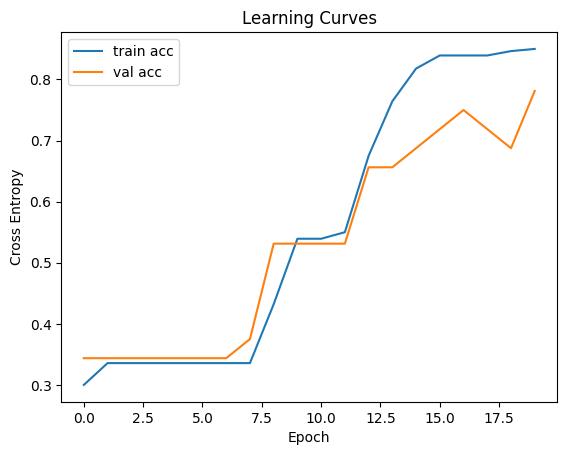

In [ ]:
#Plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(lstm_history.history['accuracy'], label='train acc')
plt.plot(lstm_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
#slot filling  RUN ONCE
def line2vec(line):
  vec=[]
  for word in line:
    if word in glove_embeddings:
      vec.append(glove_embeddings[word])
  return vec

def lines2vec(lines):
  vec=[]
  for line in lines:
    vec.append(line2vec(line))
  return vec

slot_X, y_slot, y_intent=loading_atis()

all_slots=list(set([slot for slots in y_slot for slot in slots]))
print(len(all_slots))
print(all_slots)

X=[]
Y=[]

NUM_CLASSES=len(all_slots)
for i in range(len(slot_X)):
  words=[]
  tmpy=[]
  sent=slot_X[i].split()
  tags=y_slot[i]
  for j in range(len(sent)):
    word=sent[j]
    tag=tags[j]
    if word in glove_embeddings:
      words.append(glove_embeddings[word])
      tmpy.append(to_categorical(all_slots.index(tag), num_classes=NUM_CLASSES))
  X.append(words)
  #print(tags)
  Y.append(tmpy)



Done  loading:  /content/drive/MyDrive/data/atis.train.pkl
      samples: 4978
   vocab_size:  943
   slot count:  129
 intent count:   26
Done  loading:  /content/drive/MyDrive/data/atis.test.pkl
      samples:  893
   vocab_size:  943
   slot count:  129
 intent count:   26
123
['I-depart_date.day_number', 'B-transport_type', 'B-airport_name', 'B-meal_code', 'I-airline_name', 'I-fare_basis_code', 'B-depart_time.period_of_day', 'B-return_date.month_name', 'B-cost_relative', 'B-mod', 'I-arrive_time.time_relative', 'B-time_relative', 'I-meal_description', 'I-cost_relative', 'B-depart_date.day_name', 'B-arrive_date.day_number', 'I-toloc.city_name', 'B-return_date.day_name', 'B-toloc.state_name', 'I-time', 'B-time', 'B-fromloc.city_name', 'B-flight_stop', 'B-today_relative', 'I-toloc.state_name', 'B-flight_mod', 'I-fromloc.state_name', 'B-return_time.period_of_day', 'I-economy', 'B-toloc.airport_code', 'I-depart_date.day_name', 'I-return_date.day_number', 'I-arrive_date.day_number', 'B-mo

In [ ]:
MAX_SEQ_LENGTH = 30  # sequences greater than 30 in length will be truncated

X_padded = pad_sequences(X, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post",dtype=float)
Y_padded = pad_sequences(Y, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post",dtype=float)
print(X_padded.shape)
print(Y_padded.shape)

(4978, 30, 200)
(4978, 30, 123)


In [ ]:
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y_padded, test_size=TEST_SIZE, random_state=42)
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

#SLOT FILLING DATA SPLIT ENDING

TRAINING DATA
Shape of input sequences: (3596, 30, 200)
Shape of output sequences: (3596, 30, 123)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (635, 30, 200)
Shape of output sequences: (635, 30, 123)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (747, 30, 200)
Shape of output sequences: (747, 30, 123)


In [ ]:
bidirect_model = Sequential()
bidirect_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bidirect_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

bidirect_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(bidirect_model.summary())
bidirect_training = bidirect_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
29/29 [==============================] - 18s 188ms/step - loss: 1.1061 - acc: 0.2896 - val_loss: 0.6461 - val_acc: 0.3038
Epoch 2/10
29/29 [==============================] - 6s 212ms/step - loss: 0.5574 - acc: 0.3304 - val_loss: 0.4819 - val_acc: 0.3479
Epoch 3/10
29/29 [==============================] - 4s 131ms/step - loss: 0.4246 - acc: 0.3599 - val_loss: 0.3681 - val_acc: 0.3607
Epoch 4/10
29/29 [==============================] - 5s 189ms/step - loss: 0.3233 - acc: 0.3736 - val_loss: 0.2832 - val_acc: 0.3775
Epoch 5/10
29/29 [==============================] - 7s 244ms/step - loss: 0.2491 - acc: 0.3915 - val_loss: 0.2202 - val_acc: 0.3966
Epoch 6/10
29/29 [==============================] - 6s 195ms/step - loss: 0.1960 - acc: 0.4066 - val_loss: 0.1773 - val_acc: 0.4042
Epoch 7/10
29/29 [==============================] - 4s 128ms/step - loss: 0.1601 - acc: 0.4131 - val_loss: 0.1480 - val_acc: 0.4104
Epoch 8/10
29/29 [==============================] - 4s 129ms/step - loss: 0

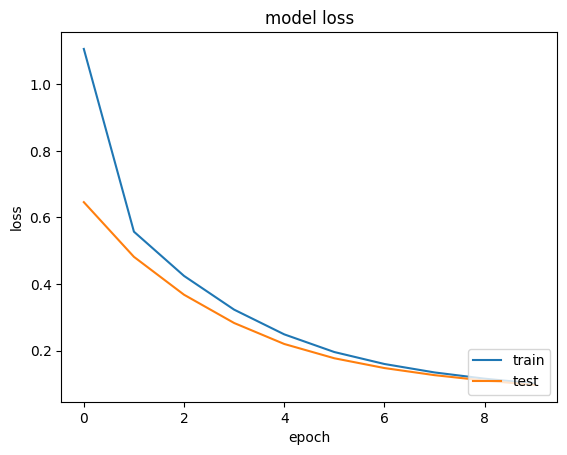

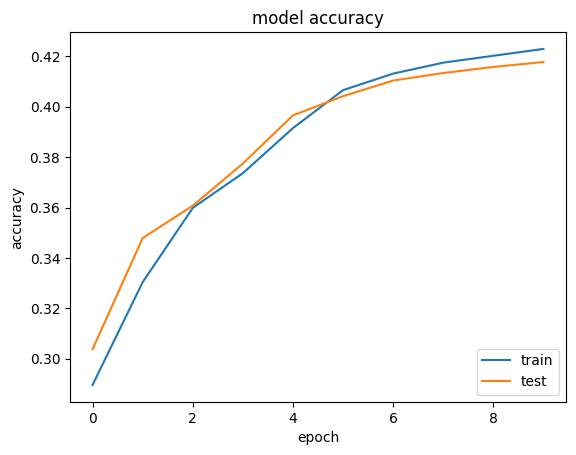

In [ ]:
plt.plot(bidirect_training.history['loss'])
plt.plot(bidirect_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

plt.plot(bidirect_training.history['acc'])
plt.plot(bidirect_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

Epoch 1/10
29/29 [==============================] - 12s 204ms/step - loss: 1.4143 - acc: 0.2944 - val_loss: 0.8035 - val_acc: 0.3038
Epoch 2/10
29/29 [==============================] - 4s 153ms/step - loss: 0.7023 - acc: 0.3078 - val_loss: 0.6340 - val_acc: 0.3038
Epoch 3/10
29/29 [==============================] - 4s 134ms/step - loss: 0.5961 - acc: 0.3079 - val_loss: 0.5589 - val_acc: 0.3067
Epoch 4/10
29/29 [==============================] - 3s 108ms/step - loss: 0.5276 - acc: 0.3407 - val_loss: 0.4955 - val_acc: 0.3509
Epoch 5/10
29/29 [==============================] - 4s 133ms/step - loss: 0.4673 - acc: 0.3568 - val_loss: 0.4404 - val_acc: 0.3539
Epoch 6/10
29/29 [==============================] - 5s 188ms/step - loss: 0.4167 - acc: 0.3616 - val_loss: 0.3954 - val_acc: 0.3613
Epoch 7/10
29/29 [==============================] - 5s 164ms/step - loss: 0.3747 - acc: 0.3686 - val_loss: 0.3568 - val_acc: 0.3678
Epoch 8/10
29/29 [==============================] - 3s 92ms/step - loss: 0.

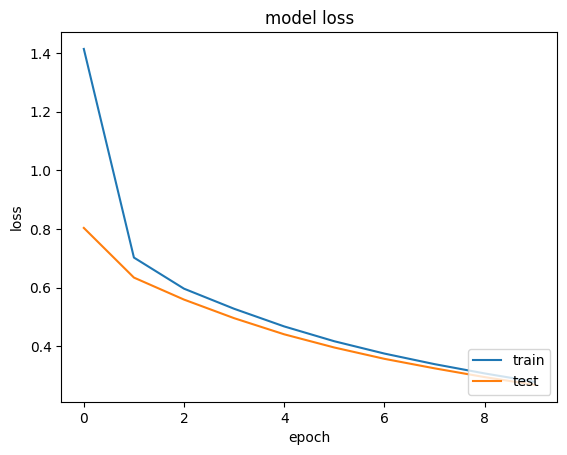

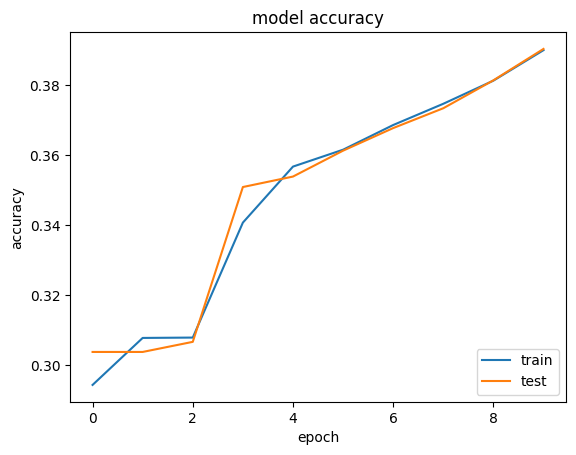

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

lstm_training = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))
plt.plot(lstm_training.history['loss'])
plt.plot(lstm_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()
plt.plot(lstm_training.history['acc'])
plt.plot(lstm_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [ ]:
def evaluate(model):
  Y=model(X_padded)
  tot=0
  cnt=0
  for sent_i in len(Y):
    for word_i in len(Y[sent_i]):
        tot+=1
        predict=Y[sent_i][word_i].argmax(1)
        result=Y_padded[sent_i][word_i].argmax(1)
        print(f'{predict}  {result}')
        if (predict==result):
          cnt+=1
  print(1.*cnt/tot)

loss, accuracy = bidirect_model.evaluate(X_padded, Y_padded, verbose = 1)
print("bidirect_model Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

loss, accuracy = lstm_model.evaluate(X_padded, Y_padded, verbose = 1)
print("lstm_model Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

156/156 [==============================] - 4s 26ms/step - loss: 0.0944 - acc: 0.4236
bidirect_model Loss: 0.0944327861070633,
Accuracy: 0.4236239492893219
156/156 [==============================] - 2s 15ms/step - loss: 0.2638 - acc: 0.3956
lstm_model Loss: 0.26381784677505493,
Accuracy: 0.3955872356891632
